C:\Users\Artem\AppData\Local\Temp\ipykernel_5180\3330166332.py:105: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=IMG_SIZE, min_width=IMG_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),


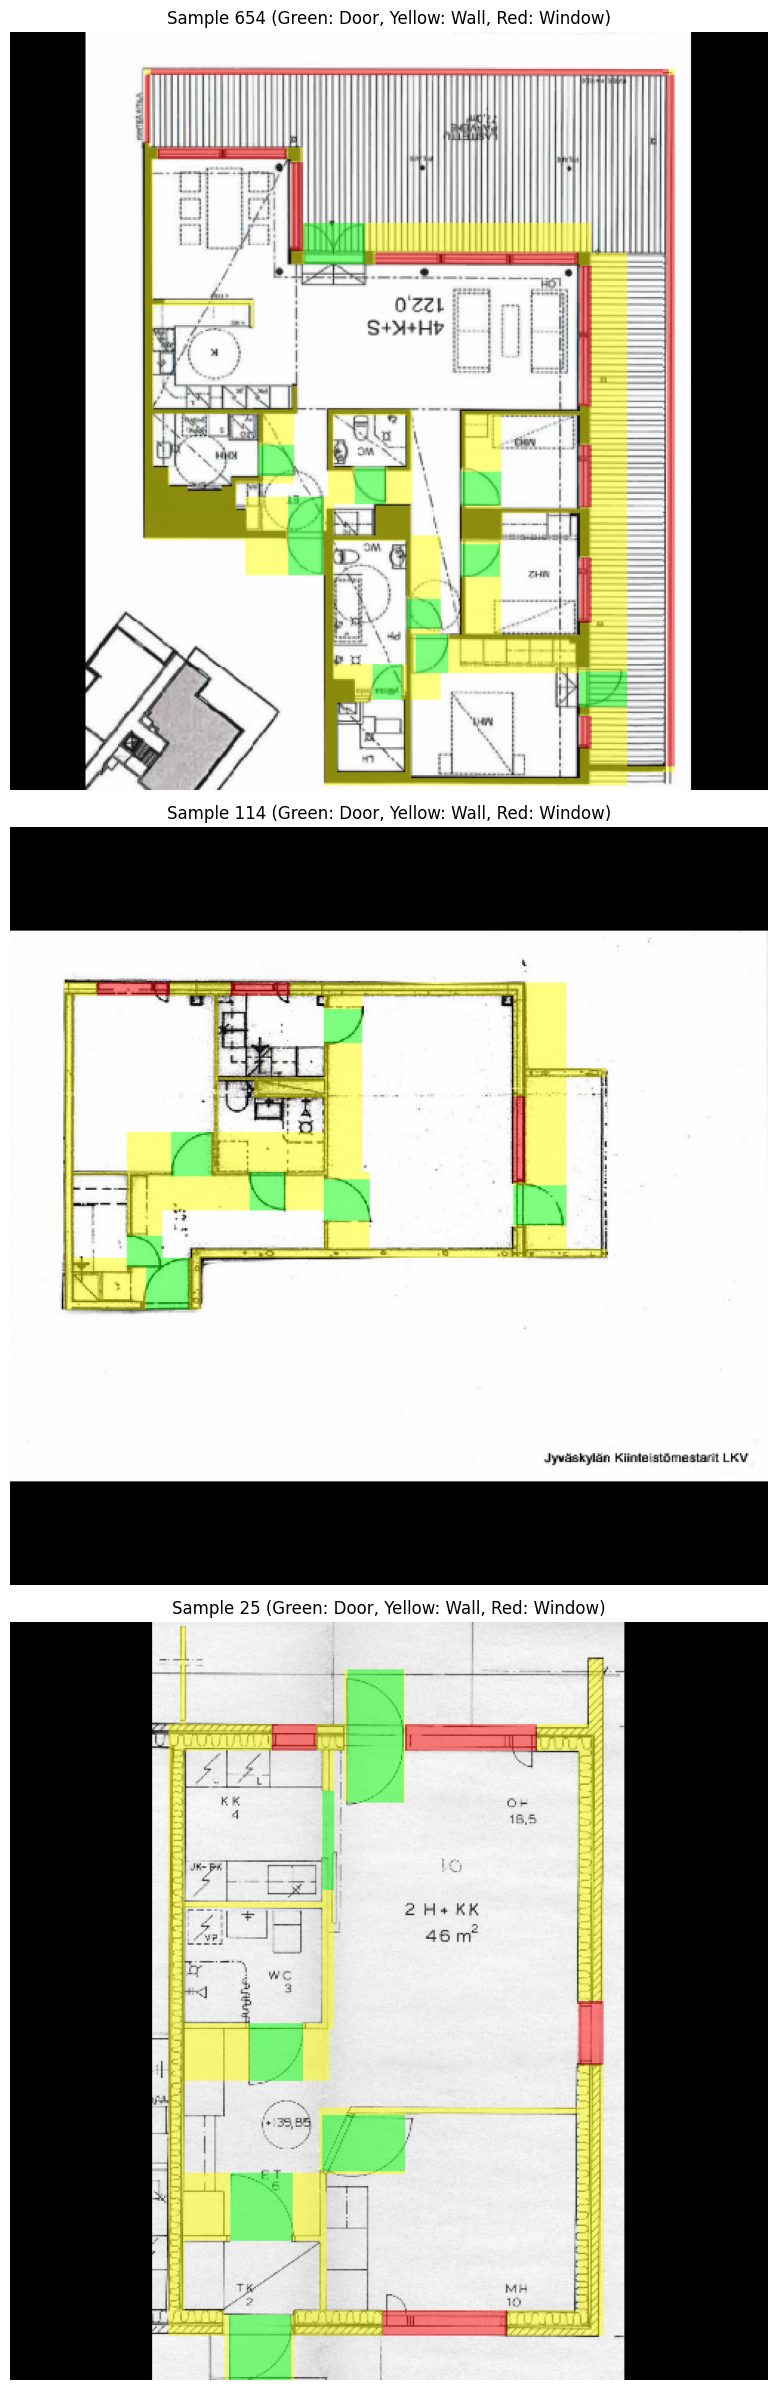

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.90it/s]



--- Epoch 1 Summary ---
Mean IoU: 0.5022
Door IoU: 0.5079 | Wall IoU: 0.4012 | Window IoU: 0.2461


Epoch 2 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:01<00:00,  1.93it/s]



--- Epoch 2 Summary ---
Mean IoU: 0.6076
Door IoU: 0.6096 | Wall IoU: 0.4905 | Window IoU: 0.4489


Epoch 3 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:00<00:00,  1.96it/s]



--- Epoch 3 Summary ---
Mean IoU: 0.6154
Door IoU: 0.5797 | Wall IoU: 0.5192 | Window IoU: 0.4731


Epoch 4 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:01<00:00,  1.92it/s]



--- Epoch 4 Summary ---
Mean IoU: 0.6328
Door IoU: 0.6140 | Wall IoU: 0.5412 | Window IoU: 0.4826


Epoch 5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:01<00:00,  1.93it/s]



--- Epoch 5 Summary ---
Mean IoU: 0.6314
Door IoU: 0.6202 | Wall IoU: 0.5382 | Window IoU: 0.4793


Epoch 6 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:01<00:00,  1.94it/s]



--- Epoch 6 Summary ---
Mean IoU: 0.6698
Door IoU: 0.6699 | Wall IoU: 0.5761 | Window IoU: 0.5271


Epoch 7 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.90it/s]



--- Epoch 7 Summary ---
Mean IoU: 0.6665
Door IoU: 0.6439 | Wall IoU: 0.5772 | Window IoU: 0.5416


Epoch 8 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.90it/s]



--- Epoch 8 Summary ---
Mean IoU: 0.6746
Door IoU: 0.6671 | Wall IoU: 0.5952 | Window IoU: 0.5232


Epoch 9 [Val]: 100%|█████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.92it/s]



--- Epoch 9 Summary ---
Mean IoU: 0.6911
Door IoU: 0.6788 | Wall IoU: 0.6090 | Window IoU: 0.5583


Epoch 10 [Val]: 100%|████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.91it/s]



--- Epoch 10 Summary ---
Mean IoU: 0.6827
Door IoU: 0.6650 | Wall IoU: 0.6103 | Window IoU: 0.5376


Epoch 11 [Val]: 100%|████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.91it/s]



--- Epoch 11 Summary ---
Mean IoU: 0.6873
Door IoU: 0.6693 | Wall IoU: 0.6084 | Window IoU: 0.5576


Epoch 12 [Val]: 100%|████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.89it/s]



--- Epoch 12 Summary ---
Mean IoU: 0.6968
Door IoU: 0.6706 | Wall IoU: 0.6223 | Window IoU: 0.5723


Epoch 13 [Val]: 100%|████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.91it/s]



--- Epoch 13 Summary ---
Mean IoU: 0.7063
Door IoU: 0.6972 | Wall IoU: 0.6290 | Window IoU: 0.5774


Epoch 14 [Val]: 100%|████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.91it/s]



--- Epoch 14 Summary ---
Mean IoU: 0.7082
Door IoU: 0.7053 | Wall IoU: 0.6326 | Window IoU: 0.5720


Epoch 15 [Val]: 100%|████████████████████████████████████████████████████████████████| 119/119 [01:02<00:00,  1.91it/s]



--- Epoch 15 Summary ---
Mean IoU: 0.7050
Door IoU: 0.6858 | Wall IoU: 0.6305 | Window IoU: 0.5815


In [8]:
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
from transformers import SegformerForSemanticSegmentation
from torch.optim import AdamW
from tqdm.auto import tqdm
from sklearn.metrics import jaccard_score

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_DIR = '../data/black_and_white'
IMG_SIZE = 512
BATCH_SIZE = 8
EPOCHS = 15
LEARNING_RATE = 2e-4

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

class DiceCELoss(nn.Module):
    def __init__(self, weight=None):
        super(DiceCELoss, self).__init__()
        self.ce = nn.CrossEntropyLoss(weight=weight)
        
    def forward(self, logits, target):
        ce_loss = self.ce(logits, target)
        num_classes = logits.shape[1]
        probs = F.softmax(logits, dim=1)
        target_one_hot = F.one_hot(target, num_classes).permute(0, 3, 1, 2).float()
        
        dims = (0, 2, 3)
        intersection = torch.sum(probs * target_one_hot, dims)
        cardinality = torch.sum(probs + target_one_hot, dims)
        
        dice_loss = 1 - (2. * intersection + 1e-6) / (cardinality + 1e-6)
        return ce_loss + dice_loss.mean()

def calculate_weights(data_dir):
    txt_files = [f for f in os.listdir(data_dir) if f.endswith('.txt')]
    areas = np.zeros(3)
    for txt in txt_files:
        with open(os.path.join(data_dir, txt), 'r') as f:
            for line in f:
                parts = line.split()
                if len(parts) == 5:
                    cls, _, _, w, h = map(float, parts)
                    if int(cls) < 3:
                        areas[int(cls)] += (w * h)
    bg_area = len(txt_files) - np.sum(areas)
    total_areas = np.insert(areas, 0, bg_area)
    weights = len(txt_files) / (4 * total_areas)
    return torch.tensor(weights / np.min(weights), dtype=torch.float32).to(DEVICE)

class FloorPlanDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        files = os.listdir(data_dir)
        self.images = sorted([f for f in files if f.endswith('.png') and f.replace('.png', '.txt') in files])
        
    def __len__(self):
        return len(self.images)
    
    def yolo_to_mask(self, label_path, h, w):
        mask = np.zeros((h, w), dtype=np.int64)
        if not os.path.exists(label_path):
            return mask
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        draw_order = {1: 0, 0: 1, 2: 2}
        lines.sort(key=lambda x: draw_order.get(int(x.split()[0]), -1))
        
        for line in lines:
            cls, cx, cy, bw, bh = map(float, line.split())
            x1, y1 = int((cx - bw / 2) * w), int((cy - bh / 2) * h)
            x2, y2 = int((cx + bw / 2) * w), int((cy + bh / 2) * h)
            mask[max(0, y1):min(h, y2), max(0, x1):min(w, x2)] = int(cls) + 1
        return mask

    def __getitem__(self, idx):
        img_path = os.path.join(self.data_dir, self.images[idx])
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        mask = self.yolo_to_mask(img_path.replace('.png', '.txt'), img.shape[0], img.shape[1])
        if self.transform:
            augmented = self.transform(image=img, mask=mask)
            img, mask = augmented['image'], augmented['mask']
        return img, mask

base_transform = A.Compose([
    A.LongestMaxSize(max_size=IMG_SIZE),
    A.PadIfNeeded(min_height=IMG_SIZE, min_width=IMG_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

def denormalize(img):
    img = img.permute(1, 2, 0).cpu().numpy()
    img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    return np.clip(img, 0, 1)

def visualize_stacked_gt(dataset, n=3, alpha=0.5):
    indices = random.sample(range(len(dataset)), n)
    fig, axes = plt.subplots(n, 1, figsize=(10, 8 * n))
    colors = np.array([[0,0,0,0], [0,255,0,255], [255,255,0,255], [255,0,0,255]])
    
    for i, idx in enumerate(indices):
        img, mask = dataset[idx]
        img_np = denormalize(img)
        mask_np = mask.numpy()
        colored_mask = colors[mask_np] / 255.0
        fg_mask = (mask_np > 0).astype(float)[:, :, np.newaxis]
        overlay = (1 - alpha * fg_mask) * img_np + (alpha * fg_mask) * colored_mask[:, :, :3]
        
        ax = axes[i] if n > 1 else axes
        ax.imshow(overlay)
        ax.set_title(f"Sample {idx} (Green: Door, Yellow: Wall, Red: Window)")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

dataset_full = FloorPlanDataset(DATA_DIR, transform=base_transform)
train_size = int(0.8 * len(dataset_full))
train_ds, val_ds = random_split(dataset_full, [train_size, len(dataset_full) - train_size])

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

visualize_stacked_gt(val_ds, n=3)

class_weights = calculate_weights(DATA_DIR)
model = SegformerForSemanticSegmentation.from_pretrained(
    "nvidia/mit-b0", 
    num_labels=4, 
    ignore_mismatched_sizes=True
).to(DEVICE)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = DiceCELoss(weight=class_weights)

best_miou = 0
for epoch in range(1, EPOCHS + 1):
    model.train()
    train_loss = 0
    for imgs, masks in tqdm(train_loader, desc=f"Epoch {epoch} [Train]"):
        imgs, masks = imgs.to(DEVICE), masks.to(DEVICE).long()
        optimizer.zero_grad()
        logits = torch.nn.functional.interpolate(model(imgs).logits, size=(IMG_SIZE, IMG_SIZE), mode='bilinear')
        loss = criterion(logits, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    all_p, all_g = [], []
    with torch.no_grad():
        for imgs, masks in tqdm(val_loader, desc=f"Epoch {epoch} [Val]"):
            out = torch.nn.functional.interpolate(model(imgs.to(DEVICE)).logits, size=(IMG_SIZE, IMG_SIZE), mode='bilinear')
            all_p.append(torch.argmax(out, dim=1).cpu().numpy())
            all_g.append(masks.numpy())
    
    y_p, y_g = np.concatenate(all_p).flatten(), np.concatenate(all_g).flatten()
    ious = jaccard_score(y_g, y_p, average=None, labels=[0, 1, 2, 3])
    miou = np.mean(ious)
    
    print(f"\n--- Epoch {epoch} Summary ---")
    print(f"Mean IoU: {miou:.4f}")
    print(f"Door IoU: {ious[1]:.4f} | Wall IoU: {ious[2]:.4f} | Window IoU: {ious[3]:.4f}")
    
    if miou > best_miou:
        best_miou = miou
        torch.save(model.state_dict(), "best_floor_model.pth")

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


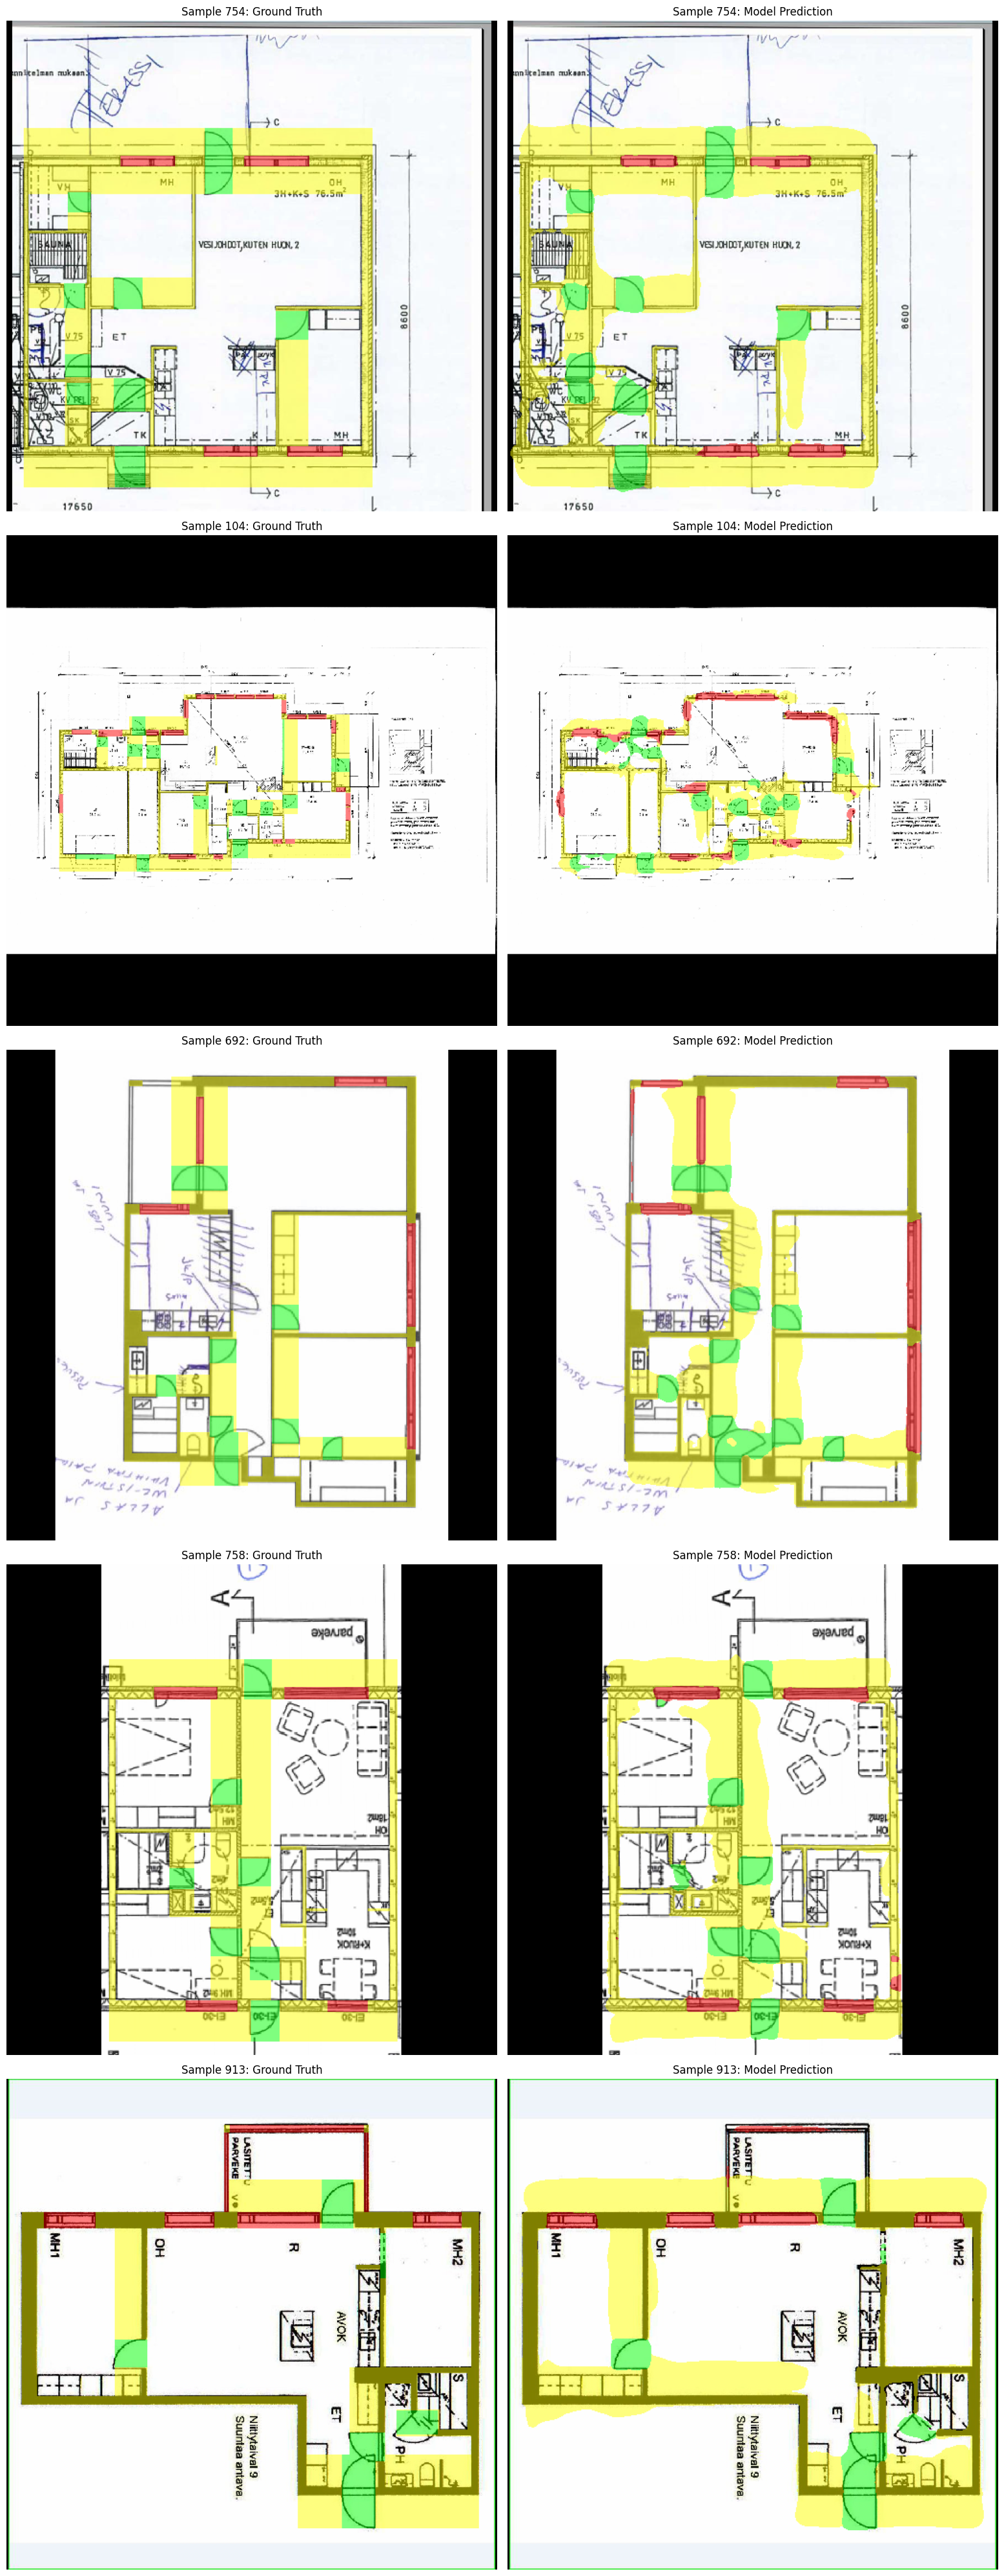

In [10]:
def visualize_inference_examples(dataset, model_path="best_floor_model.pth", n=5, alpha=0.5):
    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4, 
        ignore_mismatched_sizes=True
    ).to(DEVICE)
    
    model.load_state_dict(torch.load(model_path, map_location=DEVICE, weights_only=True))
    model.eval()

    indices = random.sample(range(len(dataset)), n)
    fig, axes = plt.subplots(n, 2, figsize=(16, 8 * n))
    
    colors = np.array([
        [0, 0, 0, 0],       # 0: Background (Transparent)
        [0, 255, 0, 255],   # 1: Door (Green)
        [255, 255, 0, 255], # 2: Wall (Yellow)
        [255, 0, 0, 255]    # 3: Window (Red)
    ])

    with torch.no_grad():
        for i, idx in enumerate(indices):
            img_tensor, gt_mask = dataset[idx]
            
            inputs = img_tensor.unsqueeze(0).to(DEVICE)
            outputs = model(inputs).logits
            logits = F.interpolate(outputs, size=(IMG_SIZE, IMG_SIZE), mode='bilinear')
            pred_mask = torch.argmax(logits, dim=1).squeeze(0).cpu().numpy()
            
            img_np = denormalize(img_tensor)
            gt_np = gt_mask.numpy()
            
            gt_overlay_colors = colors[gt_np] / 255.0
            pred_overlay_colors = colors[pred_mask] / 255.0
            
            fg_gt = (gt_np > 0).astype(float)[:, :, np.newaxis]
            fg_pred = (pred_mask > 0).astype(float)[:, :, np.newaxis]
            
            res_gt = (1 - alpha * fg_gt) * img_np + (alpha * fg_gt) * gt_overlay_colors[:, :, :3]
            res_pred = (1 - alpha * fg_pred) * img_np + (alpha * fg_pred) * pred_overlay_colors[:, :, :3]

            axes[i, 0].imshow(res_gt)
            axes[i, 0].set_title(f"Sample {idx}: Ground Truth")
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(res_pred)
            axes[i, 1].set_title(f"Sample {idx}: Model Prediction")
            axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_inference_examples(val_ds, n=5)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


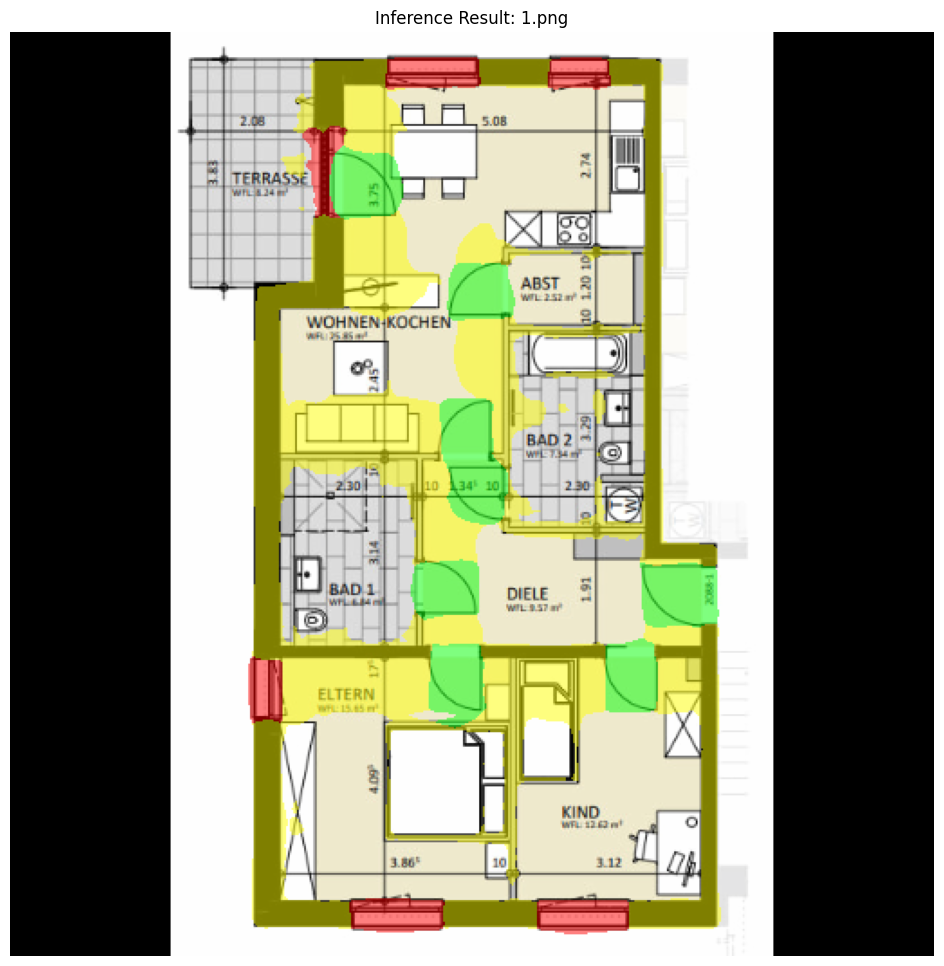

In [11]:
def predict_single_image(image_path, model_path="best_floor_model.pth", alpha=0.5):
    # 1. Load Model
    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4, 
        ignore_mismatched_sizes=True
    ).to(DEVICE)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE, weights_only=True))
    model.eval()

    # 2. Load and Preprocess Image
    original_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    
    # We use the same transform as training to ensure the model sees the correct scale/padding
    augmented = base_transform(image=original_img)
    img_tensor = augmented['image'].unsqueeze(0).to(DEVICE)

    # 3. Inference
    with torch.no_grad():
        outputs = model(img_tensor).logits
        logits = F.interpolate(outputs, size=(IMG_SIZE, IMG_SIZE), mode='bilinear')
        pred_mask = torch.argmax(logits, dim=1).squeeze(0).cpu().numpy()

    # 4. Prepare Visualization
    img_np = denormalize(augmented['image'])
    
    # Palette: [BG: Trans, Door: Green, Wall: Yellow, Window: Red]
    colors = np.array([
        [0, 0, 0, 0],       
        [0, 255, 0, 255],   
        [255, 255, 0, 255], 
        [255, 0, 0, 255]    
    ])
    
    pred_overlay_colors = colors[pred_mask] / 255.0
    fg_pred = (pred_mask > 0).astype(float)[:, :, np.newaxis]
    res_pred = (1 - alpha * fg_pred) * img_np + (alpha * fg_pred) * pred_overlay_colors[:, :, :3]

    # 5. Display
    plt.figure(figsize=(12, 12))
    plt.imshow(res_pred)
    plt.title(f"Inference Result: {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

# Run on your specific file
predict_single_image('../data/etc/1.png')

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


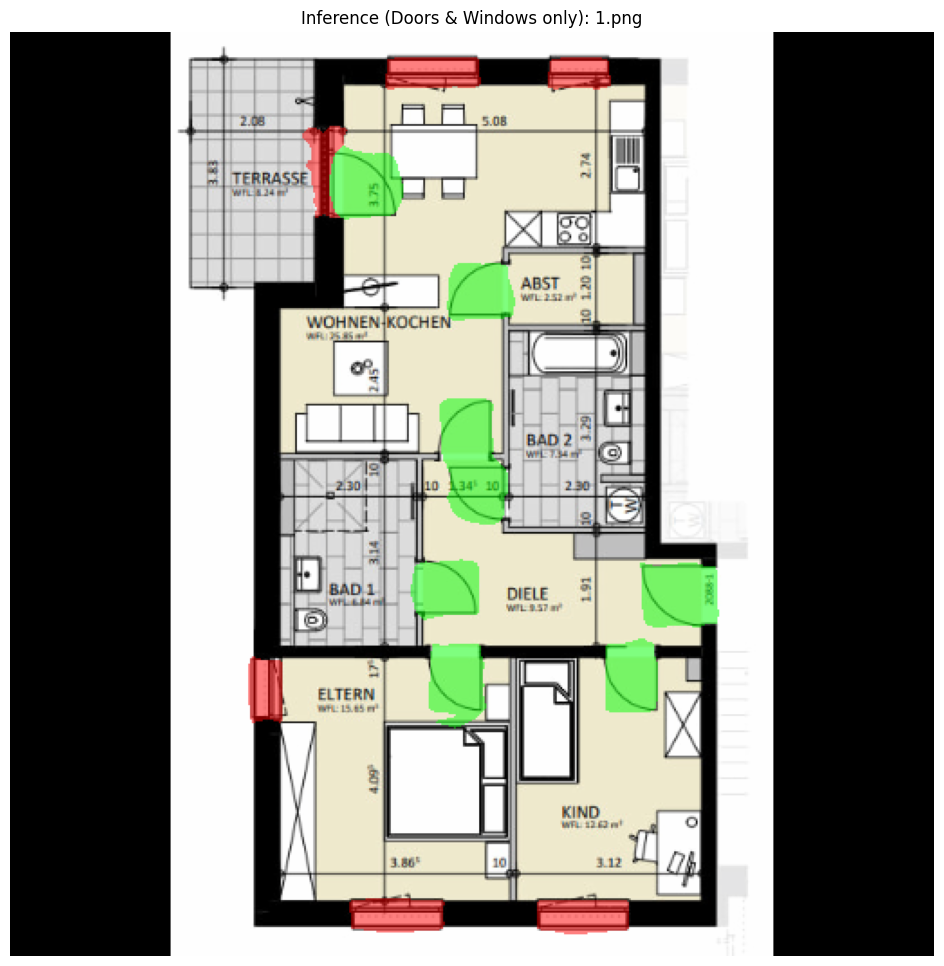

In [12]:
def predict_single_image_no_walls(image_path, model_path="best_floor_model.pth", alpha=0.5):
    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4, 
        ignore_mismatched_sizes=True
    ).to(DEVICE)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE, weights_only=True))
    model.eval()

    original_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    augmented = base_transform(image=original_img)
    img_tensor = augmented['image'].unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        outputs = model(img_tensor).logits
        logits = F.interpolate(outputs, size=(IMG_SIZE, IMG_SIZE), mode='bilinear')
        pred_mask = torch.argmax(logits, dim=1).squeeze(0).cpu().numpy()

    img_np = denormalize(augmented['image'])
    
    # Updated Palette: 
    # Index 0 (BG) and Index 2 (Wall) are now transparent
    colors = np.array([
        [0, 0, 0, 0],       # 0: BG
        [0, 255, 0, 255],   # 1: Door (Green)
        [0, 0, 0, 0],       # 2: Wall (Changed to Transparent)
        [255, 0, 0, 255]    # 3: Window (Red)
    ])
    
    pred_overlay_colors = colors[pred_mask] / 255.0
    
    # Only apply overlay for classes 1 (Door) and 3 (Window)
    # Class 2 (Wall) is now ignored in the foreground mask
    visible_mask = ((pred_mask == 1) | (pred_mask == 3)).astype(float)[:, :, np.newaxis]
    
    res_pred = (1 - alpha * visible_mask) * img_np + (alpha * visible_mask) * pred_overlay_colors[:, :, :3]

    plt.figure(figsize=(12, 12))
    plt.imshow(res_pred)
    plt.title(f"Inference (Doors & Windows only): {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

predict_single_image_no_walls('../data/etc/1.png')